In [9]:
import pandas as pd
import os

os.chdir('/Users/[editted]/Desktop/compSoc/datasets')

crime19_df = pd.read_csv('crime_incidents2019.csv')
crime20_df = pd.read_csv('crime_incidents2020.csv')
crime_df = pd.concat([crime19_df, crime20_df])

nona_df = crime_df.dropna(subset = ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 
                             'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])

nodupna_df = nona_df.drop_duplicates()
nodupna_df.to_csv('clean_crime.csv', index=False)

crime_df = pd.read_csv('clean_crime.csv')

crime_df['offense_type'] = None
crime_df['offense_type'][crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
crime_df['offense_type'][crime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'

crime_df.to_csv('clean_crime.csv', index=False)

freq_table = pd.crosstab(index=crime_df['offense_type'], columns=crime_df['YEAR'])

print(freq_table)


/var/folders/px/r9m0wp4d2r1ch92wvy399c4c0000gn/T/ipykernel_86186/2985837546.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime19_df = pd.read_csv('crime_incidents2019.csv')
/var/folders/px/r9m0wp4d2r1ch92wvy399c4c0000gn/T/ipykernel_86186/2985837546.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime20_df = pd.read_csv('crime_incidents2020.csv')
/var/folders/px/r9m0wp4d2r1ch92wvy399c4c0000gn/T/ipykernel_86186/2985837546.py:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('clean_crime.csv')
/var/folders/px/r9m0wp4d2r1ch92wvy399c4c0000gn/T/ipykernel_86186/2985837546.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

YEAR             2019   2020
offense_type                
property crime  13158  12227
violent crime    8324   5152


Crime of all types went down in 2020, with a much sharper decline in violent crimes. This difference is likely due to the COVID-19 pandemic, which may have dissuaded perpetrators of violent crimes more than those of property crimes.

/var/folders/px/r9m0wp4d2r1ch92wvy399c4c0000gn/T/ipykernel_86186/426979272.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('clean_crime.csv')


<AxesSubplot:xlabel='INCIDENT_NUMBER', ylabel='INCIDENT_NUMBER'>

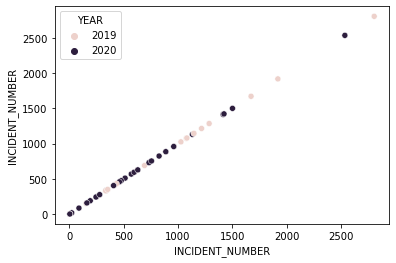

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime_df = pd.read_csv('clean_crime.csv')

district_df = crime_df.groupby(['offense_type', 'YEAR', 'DISTRICT']).agg({'INCIDENT_NUMBER': 'count', 'SHOOTING': 'sum'}).reset_index()
district_violence = district_df[district_df['offense_type'] == 'violent crime']
district_property = district_df[district_df['offense_type'] == 'property crime']


sns.scatterplot(x='INCIDENT_NUMBER', y='INCIDENT_NUMBER', data = district_df, hue='YEAR')
#can we go over this more in class I have no clue how to do this haha






/var/folders/px/r9m0wp4d2r1ch92wvy399c4c0000gn/T/ipykernel_86186/3820144029.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('clean_crime.csv')


<AxesSubplot:xlabel='DISTRICT', ylabel='INCIDENT_NUMBER'>

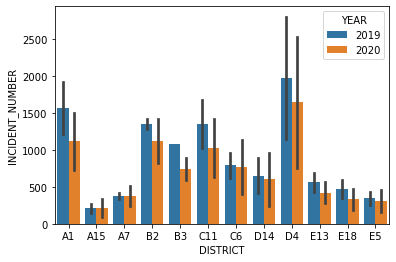

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

crime_df = pd.read_csv('clean_crime.csv')
crime_df = crime_df[crime_df.DISTRICT != 'External']

district_df = crime_df.groupby(['offense_type', 'YEAR', 'DISTRICT']).agg({'INCIDENT_NUMBER': 'count', 'SHOOTING': 'sum'}).reset_index()

sns.barplot(x='DISTRICT', y='INCIDENT_NUMBER', data = district_df, hue = 'YEAR')

/var/folders/px/r9m0wp4d2r1ch92wvy399c4c0000gn/T/ipykernel_86186/3743150282.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('clean_crime.csv')
/var/folders/px/r9m0wp4d2r1ch92wvy399c4c0000gn/T/ipykernel_86186/3743150282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['QUARTER'] = (crime_df['MONTH'] - 1)//3 + 1


<AxesSubplot:xlabel='QUARTER', ylabel='SHOOTING'>

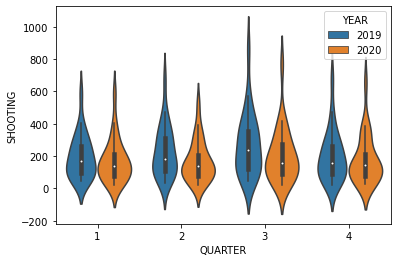

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

crime_df = pd.read_csv('clean_crime.csv')
crime_df = crime_df[crime_df.DISTRICT != 'External']

crime_df['QUARTER'] = (crime_df['MONTH'] - 1)//3 + 1

district_df = crime_df.groupby(['offense_type', 'QUARTER', 'YEAR', 'DISTRICT']).agg({'INCIDENT_NUMBER': 'count', 'SHOOTING': 'count'}).reset_index()

sns.violinplot(x='QUARTER', y='SHOOTING', data = district_df, hue = 'YEAR')




